In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#matplotlib 한글 관련 문제 해결 코드
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...') 

In [20]:
#sample3.csv 파일 읽고 상위 3개 데이터 조회
sam3 = pd.read_csv('../semi_data/sample3.csv')
sam3.head(3)

,Y\t,\tX1\t,\tX2\t,\tX3\t,\tX4\t,\tX5\t,\tX6\t,\tX7\t,\tX8\t,\tX9\t,...,\tX11\t,\tX12\t,\tX13\t,\tX14\t,\tX15\t,\tX16\t,\tX17\t,\tX18\t,\tX19\t,\tX20
0,218.236070,11,2539.9118,1366.164503,\t351.0016\t,10.0288,0.515141,99.9427,3.2225,31.2943,...,-0.02278,-2.19889,64.759,43.5399,3.8801,665.867,730.327,0.208962,137.421,\tMiddle
1,223.431272,11,2539.9118,1366.164503,\t351.0016\t,10.0288,0.515141,99.9427,3.2225,31.2943,...,-0.02278,-2.19889,64.759,43.5399,3.8801,665.867,730.327,0.208962,137.421,\tMiddle
2,230.026980,11,2539.9118,1366.164503,\t351.0016\t,10.0288,0.515141,99.9427,3.2225,31.2943,...,-0.02278,-2.19889,64.759,43.5399,3.8801,665.867,730.327,0.208962,137.421,\tMiddle


In [21]:
#컬럼 데이터 조회
sam3.columns


Index(['Y\t', '\tX1\t', '\tX2\t', '\tX3\t', '\tX4\t', '\tX5\t', '\tX6\t',
       '\tX7\t', '\tX8\t', '\tX9\t', '\tX10\t', '\tX11\t', '\tX12\t',
       '\tX13\t', '\tX14\t', '\tX15\t', '\tX16\t', '\tX17\t', '\tX18\t',
       '\tX19\t', '\tX20'],
      dtype='object')

In [23]:
#컬럼명의 좌, 우 찌꺼기값 제거
sam3.columns=sam3.columns.str.strip('\t')
sam3.columns


Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20'],
      dtype='object')

In [24]:
#데이터에 들어가 있는 \t, \n의 값 제거
# X4와 X20 데이터
# 찌꺼기값 제거후 상위 3개 데이터 조회
sam3['X4']=sam3['X4'].str.strip('\t')
sam3['X20']=sam3['X20'].str.strip('\t')
sam3.head(3)


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,218.236070,11,2539.9118,1366.164503,351.0016,10.0288,0.515141,99.9427,3.2225,31.2943,...,-0.02278,-2.19889,64.759,43.5399,3.8801,665.867,730.327,0.208962,137.421,Middle
1,223.431272,11,2539.9118,1366.164503,351.0016,10.0288,0.515141,99.9427,3.2225,31.2943,...,-0.02278,-2.19889,64.759,43.5399,3.8801,665.867,730.327,0.208962,137.421,Middle
2,230.026980,11,2539.9118,1366.164503,351.0016,10.0288,0.515141,99.9427,3.2225,31.2943,...,-0.02278,-2.19889,64.759,43.5399,3.8801,665.867,730.327,0.208962,137.421,Middle


In [37]:
#dataframe의 정보 조회 : 
sam3.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 21 columns):
Y      2878 non-null float64
X1     2878 non-null int64
X2     2878 non-null float64
X3     2878 non-null float64
X4     2878 non-null object
X5     2878 non-null float64
X6     2878 non-null float64
X7     2878 non-null float64
X8     2878 non-null float64
X9     2878 non-null float64
X10    2878 non-null float64
X11    2878 non-null float64
X12    2878 non-null float64
X13    2878 non-null float64
X14    2878 non-null float64
X15    2878 non-null float64
X16    2878 non-null float64
X17    2878 non-null float64
X18    2878 non-null float64
X19    2878 non-null float64
X20    2878 non-null object
dtypes: float64(18), int64(1), object(2)
memory usage: 472.3+ KB


In [38]:
#float64형태로 변환
#df.ID = pd.to_numeric(df.ID, errors='coerce').fillna(0).astype(np.float64)
#X4는 float type아닌 객체 타입이므로 다시 float 타입으로 변환 (pandas의 to_numeric() 함수 이용)

sam3['X4']=pd.to_numeric(sam3['X4'],errors='coerce').fillna(0).astype(np.float64)

In [39]:
#X4 컬럼의 데이터 타입 조회
sam3['X4'].dtypes


dtype('float64')

In [34]:
#NA값 체크

sam3.isna().sum(axis=0)


Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
dtype: int64

In [40]:
# 각 컬럼별 통계치 정보 조회
sam3.describe()



,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
count,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000
mean,228.249190,6.841209,2482.900934,1375.285361,310.931891,9.818905,0.529720,110.869359,3.149991,32.463338,34.563338,-0.025494,-2.290119,63.083414,49.470192,4.040470,689.474187,740.619325,0.196364,132.158434
std,19.560884,3.818002,28.623651,15.724347,97.705313,0.263980,0.022226,191.113202,0.354900,0.756531,0.756531,0.005746,0.060526,5.690839,7.338284,0.235158,20.685539,34.184348,0.027315,3.585445
min,110.315724,1.000000,2383.425900,1322.998935,0.000000,9.030090,0.479305,89.453800,-0.464000,30.394100,32.494100,-0.055561,-2.437190,50.455900,35.274000,3.606880,612.750000,518.649000,0.122367,121.647000
25%,215.803917,4.000000,2466.609000,1364.644543,331.448000,9.642950,0.517294,99.596100,3.032100,31.956300,34.056300,-0.028524,-2.331210,58.805800,44.154300,3.874390,676.451000,720.019000,0.177902,129.767250
50%,227.814177,7.000000,2482.342500,1375.716737,340.170900,9.825680,0.527196,102.183000,3.140900,32.397100,34.497100,-0.025165,-2.291200,62.671900,48.409700,3.970440,688.129000,740.558000,0.197365,132.210000
75%,241.979002,10.000000,2500.564700,1385.794133,347.327375,9.993970,0.538983,104.981000,3.268700,32.932000,35.032000,-0.021823,-2.248185,66.788400,53.466300,4.157668,699.653000,761.573750,0.215546,134.655000
max,282.524125,13.000000,2570.928000,1416.447430,372.040300,10.517900,0.709636,4290.170000,6.718700,35.084600,37.184600,-0.003452,-2.138110,79.972700,78.259700,4.877850,752.920000,895.186000,0.264133,141.572000


In [43]:
#주요 사용 컬럼명 변경 : Y=> refresh, X1-> Wafer_Site, X2-> ISO_Etch_Depth, X3-> BG_Etch_Depth, X4->BG_Etch_Height, X5 -> Ohm
#X20 -> Zone (df.rename 이용)

sam3.rename(columns={'Y':'refresh', 'X1':'Wafer_Site', 'X2':'ISO_Etch_Depth', 'X3':'BG_Etch_Depth','X4':'BG_Etch_Height','X5':'Ohm','X20':'Zone'},inplace=True)
sam3


,refresh,Wafer_Site,ISO_Etch_Depth,BG_Etch_Depth,BG_Etch_Height,Ohm,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,Zone
0,218.236070,11,2539.9118,1366.164503,351.0016,10.02880,0.515141,99.9427,3.2225,31.2943,...,-0.022780,-2.19889,64.7590,43.5399,3.88010,665.867,730.327,0.208962,137.421,Middle
1,223.431272,11,2539.9118,1366.164503,351.0016,10.02880,0.515141,99.9427,3.2225,31.2943,...,-0.022780,-2.19889,64.7590,43.5399,3.88010,665.867,730.327,0.208962,137.421,Middle
2,230.026980,11,2539.9118,1366.164503,351.0016,10.02880,0.515141,99.9427,3.2225,31.2943,...,-0.022780,-2.19889,64.7590,43.5399,3.88010,665.867,730.327,0.208962,137.421,Middle
3,226.483171,11,2539.9118,1366.164503,351.0016,10.02880,0.515141,99.9427,3.2225,31.2943,...,-0.022780,-2.19889,64.7590,43.5399,3.88010,665.867,730.327,0.208962,137.421,Middle
4,230.891184,10,2525.4065,1360.837344,343.8719,9.79299,0.532531,102.8960,3.3056,30.5030,...,-0.022318,-2.23142,67.6617,45.7270,3.89810,691.591,732.182,0.182436,137.111,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,263.744780,12,2505.3764,1348.746932,0.0000,10.08710,0.506639,101.2190,3.2986,31.3801,...,-0.026033,-2.24917,68.7407,55.1586,3.78855,701.743,693.770,0.255549,137.794,Middle
2874,266.746873,12,2505.3764,1348.746932,0.0000,10.08710,0.506639,101.2190,3.2986,31.3801,...,-0.026033,-2.24917,68.7407,55.1586,3.78855,701.743,693.770,0.255549,137.794,Middle
2875,237.161982,8,2464.3763,1386.903897,0.0000,10.00180,0.538869,103.9180,3.1267,32.8832,...,-0.027508,-2.19597,56.9631,41.3779,4.63157,668.036,714.459,0.217758,132.948,Center
2876,225.412200,8,2464.3763,1386.903897,0.0000,10.00180,0.538869,103.9180,3.1267,32.8832,...,-0.027508,-2.19597,56.9631,41.3779,4.63157,668.036,714.459,0.217758,132.948,Center


In [44]:
#변경된 정보를 refresh율로 내림차순으로 정렬하여 top 3만 조회

sam3.sort_values(by="refresh",ascending=False).head(3)


,refresh,Wafer_Site,ISO_Etch_Depth,BG_Etch_Depth,BG_Etch_Height,Ohm,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,Zone
791,282.524125,11,2500.5168,1352.837614,339.4017,10.18380,0.522899,100.5210,3.1727,31.5565,...,-0.030461,-2.23528,58.4657,46.3317,3.83179,679.842,763.337,0.219792,138.315,Middle
826,278.844900,4,2490.3768,1352.309211,340.7249,10.07070,0.545787,100.6960,3.2918,31.6024,...,-0.028374,-2.31495,66.7135,52.4901,3.87451,615.878,745.502,0.156332,137.021,Edge
397,278.168057,1,2505.5696,1354.928786,352.0952,9.79039,0.539753,98.3137,3.2431,32.6930,...,-0.025307,-2.38464,63.9188,61.2710,4.16279,713.065,731.210,0.207050,131.259,Edge


In [47]:
#refresh율의 통계치 정보 조회

sam3['refresh'].describe()


count    2878.000000
mean      228.249190
std        19.560884
min       110.315724
25%       215.803917
50%       227.814177
75%       241.979002
max       282.524125
Name: refresh, dtype: float64

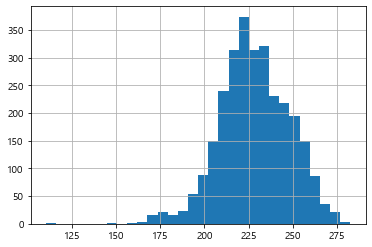

In [64]:
### refresh의 분포 비교

sam3['refresh'].hist(bins=30)


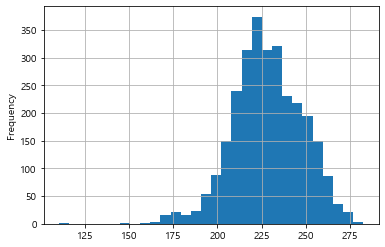

In [65]:
#pandas의 plot() 함수이용하여 histogram plotting

sam3['refresh'].plot(kind="hist",bins=30,grid=50)


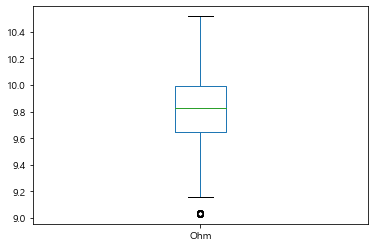

In [66]:
#Ohm의 값을 pandas의 plot함수(kind='box')를 이용하여 plotting

sam3['Ohm'].plot(kind='box')


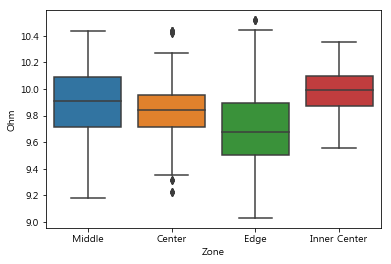

In [22]:
#seaborn의 boxplot(x, y, data)를 이용하여 plotting



In [76]:
#Wafer_Site의 고유값들이 어떤 것이 있는지 조회

sam3['Wafer_Site'].unique()

array([11, 10,  9,  2,  7,  3,  8, 12,  1,  5,  4,  6, 13], dtype=int64)

In [82]:
#ISO_Etch_Depth ~ Ohm 까지 Selection 해서 통계 Data 출력
sam3.loc[:,'ISO_Etch_Depth':'Ohm'].describe()

,ISO_Etch_Depth,BG_Etch_Depth,BG_Etch_Height,Ohm
count,2878.000000,2878.000000,2878.000000,2878.000000
mean,2482.900934,1375.285361,310.931891,9.818905
std,28.623651,15.724347,97.705313,0.263980
min,2383.425900,1322.998935,0.000000,9.030090
25%,2466.609000,1364.644543,331.448000,9.642950
50%,2482.342500,1375.716737,340.170900,9.825680
75%,2500.564700,1385.794133,347.327375,9.993970
max,2570.928000,1416.447430,372.040300,10.517900


In [85]:
#수율(refresh)top5 조회

sam3.sort_values('refresh',ascending=False).head(5)


,refresh,Wafer_Site,ISO_Etch_Depth,BG_Etch_Depth,BG_Etch_Height,Ohm,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,Zone
791,282.524125,11,2500.5168,1352.837614,339.4017,10.18380,0.522899,100.5210,3.1727,31.5565,...,-0.030461,-2.23528,58.4657,46.3317,3.83179,679.842,763.337,0.219792,138.315,Middle
826,278.844900,4,2490.3768,1352.309211,340.7249,10.07070,0.545787,100.6960,3.2918,31.6024,...,-0.028374,-2.31495,66.7135,52.4901,3.87451,615.878,745.502,0.156332,137.021,Edge
397,278.168057,1,2505.5696,1354.928786,352.0952,9.79039,0.539753,98.3137,3.2431,32.6930,...,-0.025307,-2.38464,63.9188,61.2710,4.16279,713.065,731.210,0.207050,131.259,Edge
399,277.365473,1,2505.5696,1354.928786,352.0952,9.79039,0.539753,98.3137,3.2431,32.6930,...,-0.025307,-2.38464,63.9188,61.2710,4.16279,713.065,731.210,0.207050,131.259,Edge
400,276.567778,1,2505.5696,1354.928786,352.0952,9.79039,0.539753,98.3137,3.2431,32.6930,...,-0.025307,-2.38464,63.9188,61.2710,4.16279,713.065,731.210,0.207050,131.259,Edge


In [26]:
#Zone별 Site별 refresh 평균을 피봇테이블을 이용하여 구하세요





refresh
Zone         Wafer_Site            
Center       6           225.287328
             7           217.551437
             8           219.457258
             9           224.160725
Edge         1           231.933207
             2           232.367249
             4           232.831029
             5           230.004847
Inner Center 3           212.197803
Middle       10          232.550532
             11          238.112059
             12          236.150987
             13          231.514697

In [27]:
#Zone별 Site별 refresh, Ohm의 평균, 합, 크기 피봇팅




mean                     sum                \
                               Ohm     refresh         Ohm       refresh   
Zone         Wafer_Site                                                    
Center       6           10.003995  225.287328  1720.68707  38749.420452   
             7            9.826816  217.551437  2613.93316  57868.682345   
             8            9.729344  219.457258  2549.08807  57497.801540   
             9            9.912198  224.160725  1764.37121  39900.609061   
Edge         1            9.636925  231.933207  2977.80970  71667.361116   
             2            9.895137  232.367249  2424.30861  56929.975955   
             4            9.682663  232.831029  1433.03410  34458.992305   
             5            9.615665  230.004847  2980.85614  71301.502668   
Inner Center 3            9.973622  212.197803  1506.01685  32041.868274   
Middle       10           9.739013  232.550532  1626.41523  38835.938782   
             11           9.898699  238.112059  2237.10590  53813.325420   
             12          10.022483  236.150987  2255.05869  53133.972165   
             13           9.909238  231.514697  2170.12310  50701.718701   

                          size          
                           Ohm refresh  
Zone         Wafer_Site                 
Center       6           172.0   172.0  
             7           266.0   266.0  
             8           262.0   262.0  
             9           178.0   178.0  
Edge         1           309.0   309.0  
             2           245.0   245.0  
             4           148.0   148.0  
             5           310.0   310.0  
Inner Center 3           151.0   151.0  
Middle       10          167.0   167.0  
             11          226.0   226.0  
             12          225.0   225.0  
             13          219.0   219.0

In [28]:
#다음의 결과와 같이 피봇팅...




BG_Etch_Depth  BG_Etch_Height  ISO_Etch_Depth  \
Zone         Wafer_Site                                                  
Center       6             1382.868919      291.813306     2463.362930   
             7             1378.712097      305.156565     2464.907181   
             8             1379.059898      309.001652     2479.541434   
             9             1380.571282      298.326616     2476.405753   
Edge         1             1368.197291      330.449685     2497.724594   
             2             1378.655237      314.252122     2499.057798   
             4             1370.377401      308.162622     2475.624947   
             5             1372.435380      315.994357     2474.296056   
Inner Center 3             1381.788606      291.185134     2425.192483   
Middle       10            1370.609117      306.861145     2476.976590   
             11            1370.070914      314.491363     2496.097365   
             12            1369.370103      319.301116     2523.256082   
             13            1380.477598      313.416755     2496.735000   
All                        1375.285361      310.931891     2482.900934   

                               Ohm     refresh  
Zone         Wafer_Site                         
Center       6           10.003995  225.287328  
             7            9.826816  217.551437  
             8            9.729344  219.457258  
             9            9.912198  224.160725  
Edge         1            9.636925  231.933207  
             2            9.895137  232.367249  
             4            9.682663  232.831029  
             5            9.615665  230.004847  
Inner Center 3            9.973622  212.197803  
Middle       10           9.739013  232.550532  
             11           9.898699  238.112059  
             12          10.022483  236.150987  
             13           9.909238  231.514697  
All                       9.818905  228.249190

In [29]:
#피봇팅한 결과를 소수 둘째자리까지만 표출할 것




BG_Etch_Depth  BG_Etch_Height  ISO_Etch_Depth    Ohm  \
Zone         Wafer_Site                                                         
Center       6                 1382.87          291.81         2463.36  10.00   
             7                 1378.71          305.16         2464.91   9.83   
             8                 1379.06          309.00         2479.54   9.73   
             9                 1380.57          298.33         2476.41   9.91   
Edge         1                 1368.20          330.45         2497.72   9.64   
             2                 1378.66          314.25         2499.06   9.90   
             4                 1370.38          308.16         2475.62   9.68   
             5                 1372.44          315.99         2474.30   9.62   
Inner Center 3                 1381.79          291.19         2425.19   9.97   
Middle       10                1370.61          306.86         2476.98   9.74   
             11                1370.07          314.49         2496.10   9.90   
             12                1369.37          319.30         2523.26  10.02   
             13                1380.48          313.42         2496.74   9.91   
All                            1375.29          310.93         2482.90   9.82   

                         refresh  
Zone         Wafer_Site           
Center       6            225.29  
             7            217.55  
             8            219.46  
             9            224.16  
Edge         1            231.93  
             2            232.37  
             4            232.83  
             5            230.00  
Inner Center 3            212.20  
Middle       10           232.55  
             11           238.11  
             12           236.15  
             13           231.51  
All                       228.25